# Introduction
**World Happiness Statistics for Years 2015-2019**

Our data are 5 datasets containing data regarding world happiness scores, from 2015 till 2019 (including). Each dataset represents a different year.

In each data set there are scores of: happiness, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption. In addition, the first column is the country name, some of the datasets have a separate column for the region. Another important column is the happiness rank, which ranks countries by their happiness rank relative to other countries. Thus, rank 1 is the happiest country in the world, and the less happy countries have a higher rank. So the less is better, in the happiness rank.

Each row in the dataset is a different country, and the scores are presumably averages of scores reported by people in surveys. The happiness rank relies on the happiness score, which in place is deducted from the other indexes. We don;t have more information on how the data was calculated.

In this project, I will concatenate all the datasets together, to have over information about all 5 years. In addition, I will concatenate only datasets with a region column, to get more data insights regarding regions' happiness and comparisons between them.

# EDA
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

## Read Files

In [3]:
# Create dataframes for each csv file
df19 = pd.read_csv('2019.csv')
df18 = pd.read_csv('2018.csv')
df17 = pd.read_csv('2017.csv')
df16 = pd.read_csv('2016.csv')
df15 = pd.read_csv('2015.csv')

## Featue Engineering

In [4]:
# Add a year column, to associate each data point with the relevant year
df19['year'] = 2019
df18['year'] = 2018
df17['year'] = 2017
df16['year'] = 2016
df15['year'] = 2015

## Display Data
### Samples

In [5]:
# Note that the tables don't necessarily have the same columns
dfs = (df15, df16, df17, df18, df19)

for df in dfs:
    print(df.year[0], '\n-----')
    print(df.sample(5))
    print()

2015 
-----
        Country                           Region  Happiness Rank  \
155       Syria  Middle East and Northern Africa             156   
108  Bangladesh                    Southern Asia             109   
75       Turkey  Middle East and Northern Africa              76   
82   Montenegro       Central and Eastern Europe              82   
52     Paraguay      Latin America and Caribbean              53   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
155            3.006         0.05015                   0.66320  0.47489   
108            4.694         0.03077                   0.39753  0.43106   
75             5.332         0.03864                   1.06098  0.94632   
82             5.192         0.05235                   0.97438  0.90557   
52             5.878         0.04563                   0.75985  1.30477   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
155                   0.72193  0.15684                 

### Data Information

In [6]:
for df in dfs:
    print(df.year[0], '\n-----')
    df.info()
    print()

2015 
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  year                           158 non

- There are 158 rows in 2015, 157 in 2016, 155 in 2017, 156 in 2018 and 156 in 2019
- Each row represents a country, so there are countries that don't appear all the years. 
- I will find the countries that are only in some years and not in others, and try to figure out what happened. However, I'll do so later on, when I create a dataframe consisting of all five years.

In [7]:
# # The coutries that are in 2019 but not in other years
# countries_notin_19 = df19[~(df19['Country or region'].isin(df15.Country)) | ~(df19['Country or region'].isin(df16.Country)) | \
#      ~(df19['Country or region'].isin(df17.Country)) | ~(df19['Country or region'].isin(df18['Country or region']))]\
#     ['Country or region'].to_list()

# countries_notin_19

### Missing Values

In [8]:
# Check how many missing values are in each dataset
for df in (df15, df16, df17, df18, df19):
    print(df.year[0])
    print('Number of Nulls is: {}\n'.format(df.isna().sum()))

2015
Number of Nulls is: Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
year                             0
dtype: int64

2016
Number of Nulls is: Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
year                      

In [9]:
# Find the row where there is a missing value
df18[df18.isnull().any(axis=1)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [10]:
# Check what was this value in 2019 
df19[df19['Country or region'] == 'United Arab Emirates']['Perceptions of corruption']

20    0.182
Name: Perceptions of corruption, dtype: float64

In [11]:
# Use 2019's value to fill in the missing value in 2018
df18['Perceptions of corruption'] = df18['Perceptions of corruption'].apply(lambda x: 0.182 if np.isnan(x) else x)

# Are there anymore missing values in 2018?
df18.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
year                            0
dtype: int64

### Reorder Columns and Change Names

In [12]:
# First, check for each dataset what are the columns names and their order
for df in dfs:
    print(df.year[0], '\n----')
    print(df.columns)
    print()

2015 
----
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year'],
      dtype='object')

2016 
----
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')

2017 
----
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'year'],
      dtype='object')

2018 
----
Index(['Overall rank', 'Country or region', 'Score', 'GDP per c

## Concatenate Tables

In [13]:
# Concat df19 and df18, which are similar
df1 = pd.concat([df18, df19], axis=0)
df1 = df1.reindex(columns = ['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 
                       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
                   'Perceptions of corruption', 'year'])

df1.sample(5)

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
10,Australia,11,7.228,1.372,1.548,1.036,0.557,0.332,0.290,2019
33,Singapore,34,6.262,1.572,1.463,1.141,0.556,0.271,0.453,2019
40,Nicaragua,41,6.141,0.668,1.319,0.700,0.527,0.208,0.128,2018
5,Switzerland,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343,2019
104,South Africa,105,4.724,0.940,1.410,0.330,0.516,0.103,0.056,2018


In [14]:
# Drop coulmns that appear in some datasets but not in others
df15.drop(['Standard Error'], axis=1, inplace = True)
df16.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis=1, inplace = True)
df17.drop(['Whisker.high', 'Whisker.low'], axis=1, inplace = True)

In [15]:
# Add region column to df17, even without any values, just to have all datasets with the same columns
df17.insert(1, 'region', '')
df17.sample(5)

,Country,region,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,year
13,United States,,14,6.993,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2.218113,2017
130,Ghana,,131,4.120,0.667225,0.873665,0.295638,0.423026,0.256924,0.025336,1.577868,2017
77,Kosovo,,78,5.279,0.951484,1.137854,0.541452,0.260288,0.319931,0.057472,2.010541,2017
133,Burkina Faso,,134,4.032,0.350228,1.043280,0.215844,0.324368,0.250865,0.120328,1.727213,2017
76,Croatia,,77,5.293,1.222556,0.967983,0.701289,0.255772,0.248003,0.043103,1.854492,2017


In [16]:
# Reindex df16
df16 = df16.reindex(columns = ['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual', 'year'])
df16.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2.73939,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2.69463,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2.83137,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2.66465,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2.82596,2016


In [17]:
# Create a list of columns, to have the same names for all 3 datasets that were not concatenated yet
cols = ['country', 'region', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'family', 'life_expectancy',\
        'freedom', 'generosity', 'trust_gov_corruption', 'dystopia', 'year']

# Assign these column names to the datasets
df17.columns, df16.columns, df15.columns = cols, cols, cols

# Did it work?
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               155 non-null    object 
 1   region                155 non-null    object 
 2   happiness_rank        155 non-null    int64  
 3   happiness_score       155 non-null    float64
 4   gdp_per_capita        155 non-null    float64
 5   family                155 non-null    float64
 6   life_expectancy       155 non-null    float64
 7   freedom               155 non-null    float64
 8   generosity            155 non-null    float64
 9   trust_gov_corruption  155 non-null    float64
 10  dystopia              155 non-null    float64
 11  year                  155 non-null    int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 14.7+ KB


In [18]:
# Concat datasets: df15, df16 and df17
df2 = pd.concat([df15, df16, df17], axis=0)

df2.sample(5)

,country,region,happiness_rank,happiness_score,gdp_per_capita,family,life_expectancy,freedom,generosity,trust_gov_corruption,dystopia,year
70,Mauritius,Sub-Saharan Africa,71,5.477,1.007610,0.985210,0.709500,0.560660,0.07521,0.377440,1.761450,2015
56,Romania,,57,5.825,1.217684,1.150091,0.685158,0.457004,0.13352,0.004388,2.176831,2017
126,Congo (Brazzaville),Sub-Saharan Africa,127,4.236,0.771090,0.477990,0.282120,0.379380,0.12077,0.097530,2.106810,2016
77,Nigeria,Sub-Saharan Africa,78,5.268,0.654350,0.904320,0.160070,0.343340,0.04030,0.272330,2.893190,2015
149,Liberia,Sub-Saharan Africa,150,3.622,0.107060,0.503530,0.231650,0.257480,0.24063,0.048520,2.232840,2016


In [19]:
# Check what are the columns of the two new dfs
for df in (df1, df2):
    print(df.columns)
    print()

Index(['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'gdp_per_capita', 'family', 'life_expectancy', 'freedom', 'generosity',
       'trust_gov_corruption', 'dystopia', 'year'],
      dtype='object')



In [20]:
# In df1 we need: 1) to be reordered, to fit df2's order; 2) to have the columns renamed 
# In df2 we need: to drop extra columns that don't exist in df1
# 
df1.reindex(columns = ['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'])
df1.columns = ('country', 'happiness_rank','happiness_score','gdp_per_capita', 'family', 'life_expectancy', \
               'freedom', 'generosity', 'trust_gov_corruption', 'year')
                       
df2.drop(['region', 'dystopia'], axis=1, inplace = True)

print(df1.columns)
print(df2.columns)

Index(['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita',
       'family', 'life_expectancy', 'freedom', 'generosity',
       'trust_gov_corruption', 'year'],
      dtype='object')
Index(['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita',
       'family', 'life_expectancy', 'freedom', 'generosity',
       'trust_gov_corruption', 'year'],
      dtype='object')


In [21]:
# Concat the two new dfs, to have one dataframe with all the data
df = pd.concat([df2, df1], axis=0)

df.sample(10)

,country,happiness_rank,happiness_score,gdp_per_capita,family,life_expectancy,freedom,generosity,trust_gov_corruption,year
125,Congo (Kinshasa),126,4.280,0.092102,1.229023,0.191407,0.235961,0.246456,0.060241,2017
39,Poland,40,6.182,1.206000,1.438000,0.884000,0.483000,0.117000,0.050000,2019
29,Argentina,30,6.574,1.053510,1.248230,0.787230,0.449740,0.084840,0.114510,2015
92,Macedonia,93,5.007,0.918510,1.002320,0.735450,0.334570,0.053270,0.223590,2015
55,Moldova,56,5.838,0.728871,1.251826,0.589465,0.240729,0.208779,0.010091,2017
0,Denmark,1,7.526,1.441780,1.163740,0.795040,0.579410,0.361710,0.444530,2016
57,Northern Cyprus,58,5.835,1.229000,1.211000,0.909000,0.495000,0.179000,0.154000,2018
149,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,2017
120,Burkina Faso,121,4.424,0.314000,1.097000,0.254000,0.312000,0.175000,0.128000,2018
53,Kazakhstan,54,5.919,1.229430,0.955440,0.573860,0.405200,0.150110,0.111320,2016


## Find Duplicates

In [22]:
df.duplicated().sum()

0

## Countries missing in some of the years

In [23]:
missing_countries = df.groupby('country', as_index=False)['happiness_rank'].count()
missing_countries = missing_countries[missing_countries.happiness_rank < 5].sort_values('happiness_rank')
missing_countries

,country,happiness_rank
109,North Macedonia,1
148,Taiwan Province of China,1
39,Djibouti,1
49,Gambia,1
135,Somaliland region,1
59,"Hong Kong S.A.R., China",1
134,Somaliland Region,1
121,Puerto Rico,1
112,Oman,1
143,Swaziland,2


In [30]:
  
df['country'] = df['country'].replace('Hong Kong S.A.R., China', 'Hong Kong')
df['country'] = df['country'].replace('Macedonia', 'North Macedonia')
df['country'] = df['country'].replace('Somaliland region', 'Somaliland Region')
df['country'] = df['country'].replace('Taiwan Province of China', 'Taiwan')
df['country'] = df['country'].replace('North Cyprus', 'Northern Cyprus')
df['country'] = df['country'].replace('Trinidad & Tobago', 'Trinidad and Tobago')

In [31]:
missing_countries = df.groupby('country', as_index=False)['happiness_rank'].count()
missing_countries = missing_countries[missing_countries.happiness_rank < 5].sort_values('happiness_rank')
missing_countries

,country,happiness_rank
39,Djibouti,1
49,Gambia,1
109,Oman,1
118,Puerto Rico,1
139,Swaziland,2
131,Somaliland Region,2
138,Suriname,2
13,Belize,3
31,Comoros,3
137,Sudan,4


## Features Correlations

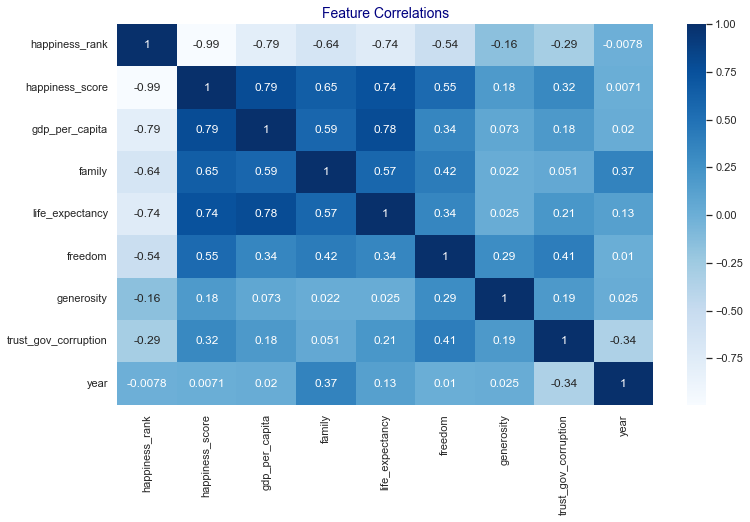

In [89]:
ax = plt.axes()
plt.gcf().set_size_inches(12,7)
sns.heatmap(df.corr(), cmap='Blues', annot=True)
ax.set_title('Feature Correlations', size=14, color='navy')
plt.yticks(rotation=0)
plt.show();

# Descriptive Analysis
## Ten Best Countries
### Overall Happiness Rank

In [36]:
# Ten countries with best averages of happiness rank over the years
best_ten_overall= df[df.happiness_rank.isin(np.arange(1,11,1))].groupby('country', as_index=False).\
    agg({'happiness_rank': 'mean','happiness_score': 'count'}).sort_values('happiness_rank')

best_ten_overall

,country,happiness_rank,happiness_score
3,Denmark,2.20,5
8,Norway,2.80,5
5,Iceland,3.20,5
4,Finland,3.60,5
10,Switzerland,3.60,5
6,Netherlands,6.20,5
2,Canada,6.80,5
7,New Zealand,8.20,5
9,Sweden,8.60,5
0,Australia,9.75,4


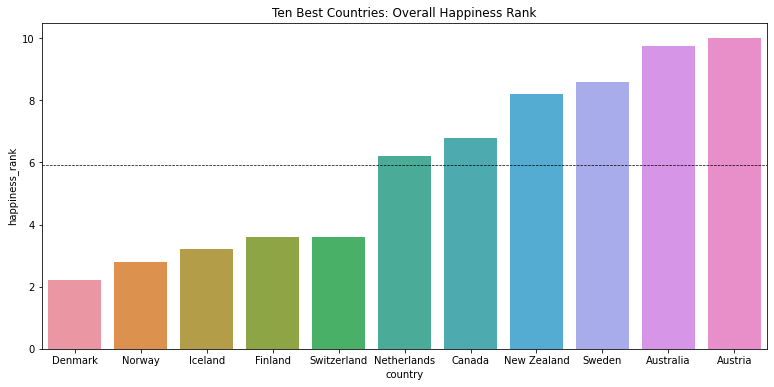

In [37]:
plt.subplots(figsize=(13,6))
plt.title('Ten Best Countries: Overall Happiness Rank')
sns.barplot(data = best_ten_overall, x= 'country', y= 'happiness_rank')
plt.axhline(best_ten_overall.happiness_rank.mean(), color='black', linewidth=0.7, linestyle="--")
plt.show()

### Happiness Rank Over the Years

In [38]:
# Ten countries with best happiness rank, per year
annual_best_ten = df[df.happiness_rank.isin(np.arange(1,11,1))][['year', 'country','happiness_rank']].\
    sort_values(['year', 'happiness_rank']).reset_index().drop('index', axis=1)

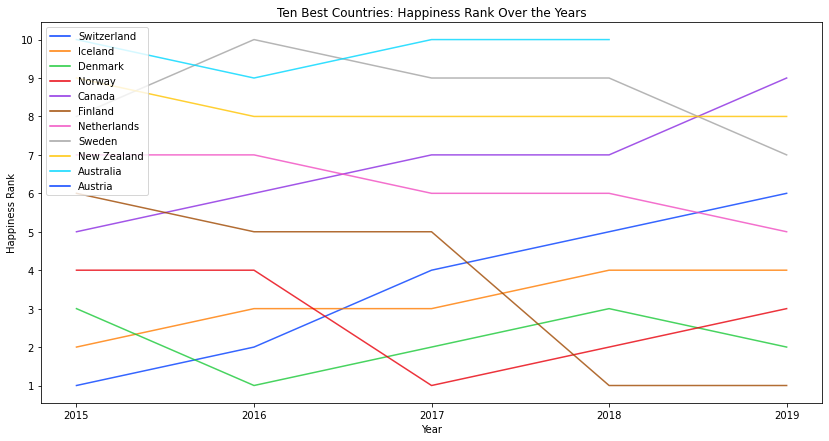

In [39]:
# Best 10 over the years
plt.subplots(figsize=(14,7))
sns.lineplot(data= annual_best_ten, x='year', y='happiness_rank', hue='country', palette='bright', alpha=0.8)
plt.title('Ten Best Countries: Happiness Rank Over the Years')
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.yticks(np.arange(1,11,1))
plt.xlabel('Year')
plt.ylabel('Happiness Rank')
plt.legend(loc='upper left')
plt.show();

## Selected Countries: Happiness Rank per Country, by year

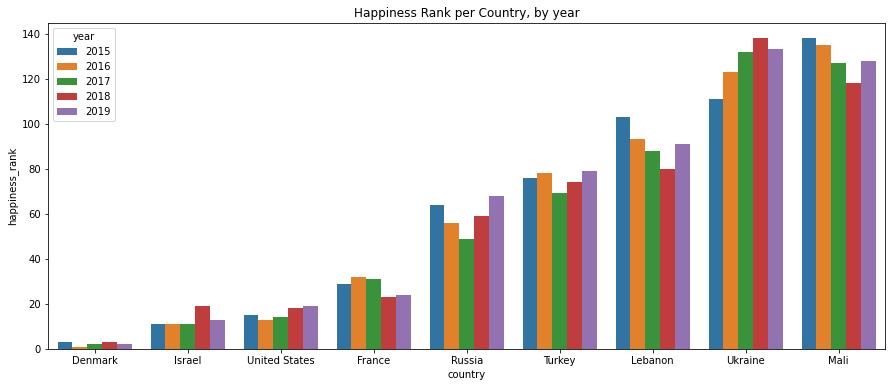

In [40]:
states = df[df.country.isin(['Denmark', 'United States', 'Russia', 'Turkey', 'France', 'Ukraine', 'Lebanon', 'Israel', 'Mali'])]

plt.subplots(figsize=(15,6))
plt.title('Happiness Rank per Country, by year')
sns.barplot(data = states, x= 'country', y= 'happiness_rank', hue = 'year')
plt.show()

## World Annual Happiness Rank

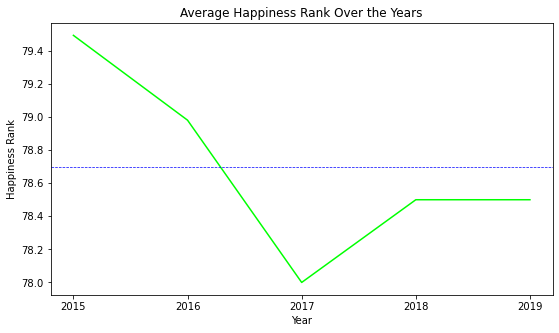

In [41]:
df.groupby('year')['happiness_rank'].mean().plot(figsize=(9,5), color='lime')
plt.axhline(df.happiness_rank.mean(), color='blue', linewidth=0.7, linestyle="--")
plt.title('Average Happiness Rank Over the Years')
plt.xticks([2015,2016,2017,2018, 2019])
plt.xlabel('Year')
plt.ylabel('Happiness Rank')
plt.show();

## World Happiness Score vs. Other Features
### HS vs. GDP per capita
- Note that I move to happiness score instead of happiness rank to have features with a positive correlation. Happiness rank works oppositely than all other scores: whereas all scores are "bad" in the low numbers and "good" in the high numbers, the rank is the best at number 1, and the higher the number is the worse the rank is. So to get resemblance to a linear graph, I will check features relative to happiness score.

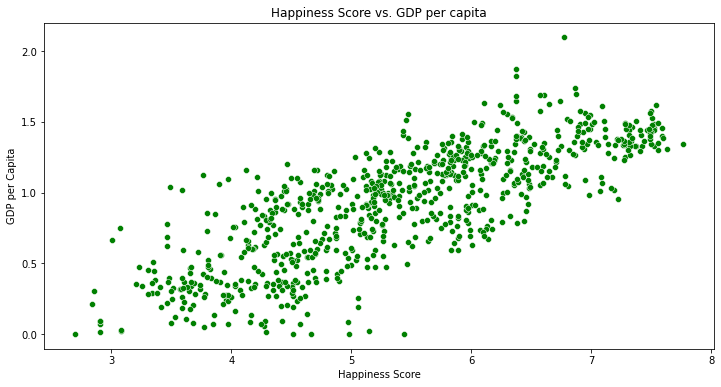

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.scatterplot(x='happiness_score', y='gdp_per_capita', data=df, color='green')
ax.set(title='Happiness Score vs. GDP per capita')
ax.set_xlabel('Happiness Score')
ax.set_ylabel('GDP per Capita')
plt.show();

### HS vs. Freedom

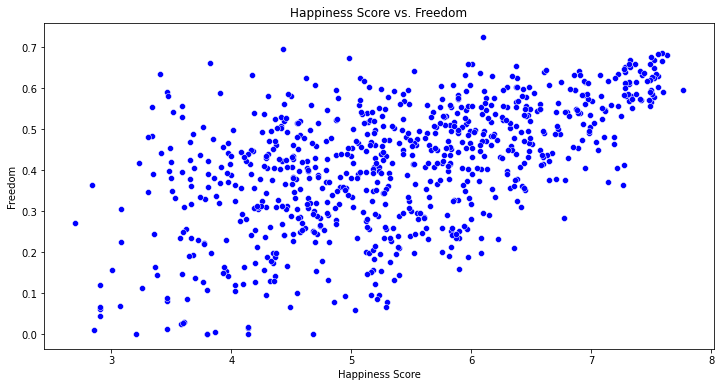

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.scatterplot(x='happiness_score', y='freedom', data=df, color='blue')
ax.set(title='Happiness Score vs. Freedom')
ax.set_xlabel('Happiness Score')
ax.set_ylabel('Freedom')
plt.show();

### HS vs. Generosity

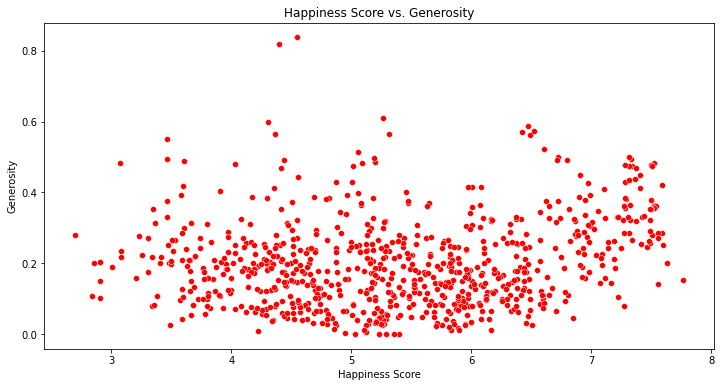

In [54]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.scatterplot(x='happiness_score', y='generosity', data=df, color='red')
ax.set(title='Happiness Score vs. Generosity')
ax.set_xlabel('Happiness Score')
ax.set_ylabel('Generosity')
plt.show();

### Average Overall Scores by Country

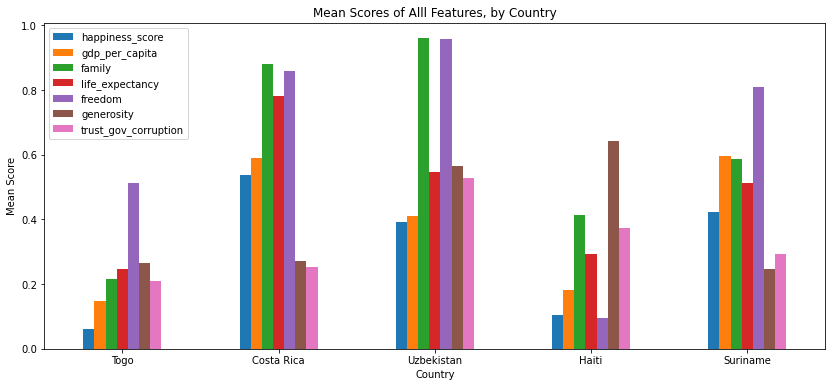

In [58]:
# Create a dataframe of averages of all features, by country
avg_all = df.groupby('country').mean().drop(['year', 'happiness_rank'], axis=1)

# Move the numbers to one scale, to be able to compare different scales
avg_all = (avg_all-avg_all.min()) / (avg_all.max())

# Show a sample of all features compred, for 5 countries
avg_all.sample(5).plot(kind='bar', figsize=(14,6))
plt.title('Mean Scores of Alll Features, by Country')
plt.xticks(rotation=0)
plt.xlabel('Country')
plt.ylabel('Mean Score')
plt.legend(loc='best')
plt.show();

## Regions

In [59]:
regs = pd.concat([df15, df16], axis=0)

regs.sample(5)

,country,region,happiness_rank,happiness_score,gdp_per_capita,family,life_expectancy,freedom,generosity,trust_gov_corruption,dystopia,year
54,Slovenia,Central and Eastern Europe,55,5.848,1.18498,1.27385,0.87337,0.60855,0.03787,0.25328,1.61583,2015
127,Botswana,Sub-Saharan Africa,128,4.332,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,1.46181,2015
6,Netherlands,Western Europe,7,7.339,1.46468,1.02912,0.81231,0.55211,0.47416,0.29927,2.70749,2016
131,Malawi,Sub-Saharan Africa,132,4.156,0.08709,0.14700,0.29364,0.41430,0.30968,0.07564,2.82859,2016
9,Sweden,Western Europe,10,7.291,1.45181,1.08764,0.83121,0.58218,0.38254,0.40867,2.54734,2016


### Average Overall Happiness Rank by Region

In [60]:
regs_mean = regs.groupby('region')['happiness_rank'].mean().reset_index().sort_values('happiness_rank')
regs_mean

,region,happiness_rank
0,Australia and New Zealand,9.000000
5,North America,9.750000
9,Western Europe,29.357143
3,Latin America and Caribbean,47.652174
2,Eastern Asia,65.833333
4,Middle East and Northern Africa,77.846154
1,Central and Eastern Europe,78.724138
6,Southeastern Asia,80.611111
7,Southern Asia,112.428571
8,Sub-Saharan Africa,128.756410


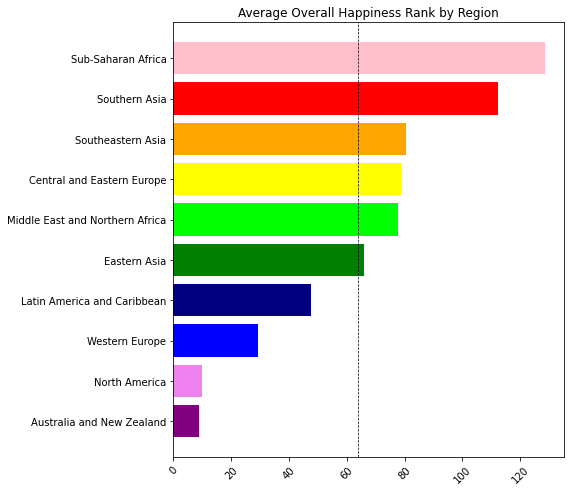

In [67]:
colors = ['purple', 'violet', 'blue', 'navy', 'green', 'lime', 'yellow', 'orange', 'red', 'pink', 'grey']

plt.subplots(figsize=(7,8))
plt.barh(regs_mean.region, regs_mean.happiness_rank, color= colors)
plt.title('Average Overall Happiness Rank by Region')
plt.xticks(rotation=45)
plt.axvline(regs_mean.happiness_rank.mean(), color='black', linewidth=0.7, linestyle="--")
plt.show();

### Happiness Rank by Country

Happiness Rank in Countries in Western Europe


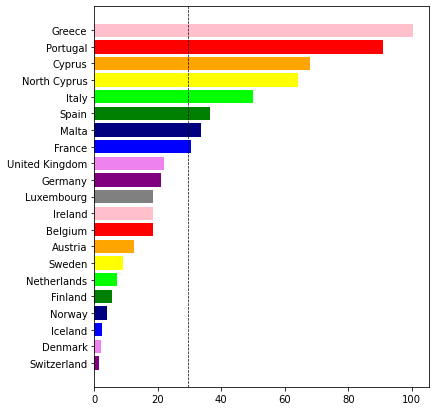

Happiness Rank in Countries in North America


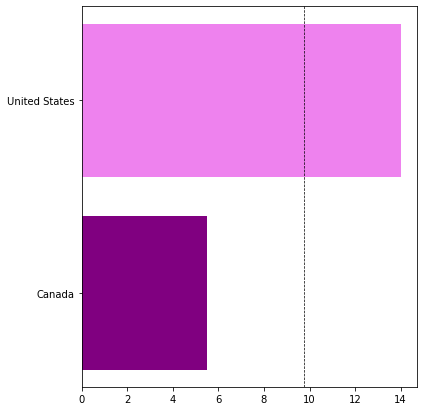

Happiness Rank in Countries in Australia and New Zealand


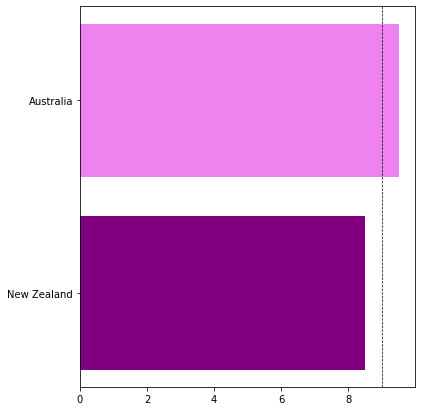

Happiness Rank in Countries in Middle East and Northern Africa


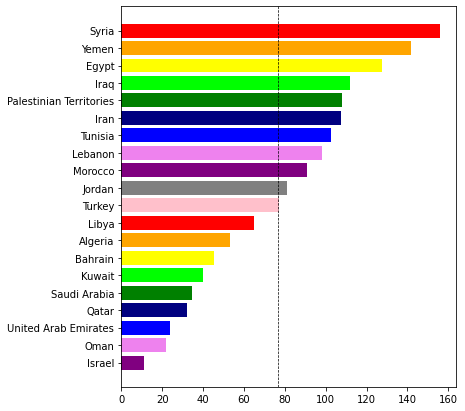

Happiness Rank in Countries in Latin America and Caribbean


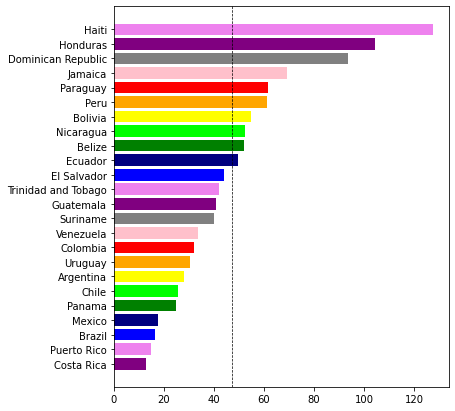

Happiness Rank in Countries in Southeastern Asia


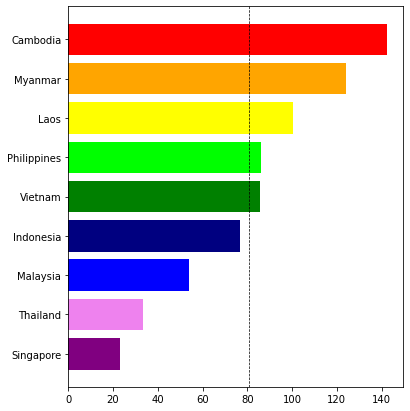

Happiness Rank in Countries in Central and Eastern Europe


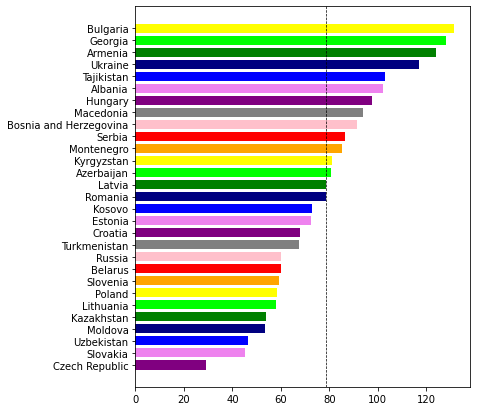

Happiness Rank in Countries in Eastern Asia


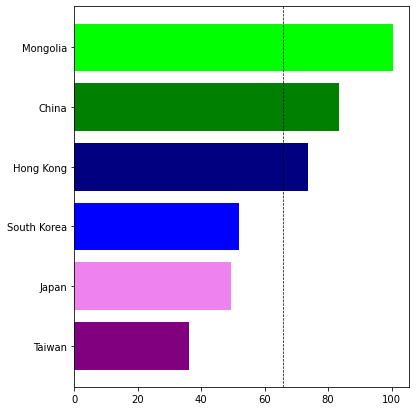

Happiness Rank in Countries in Sub-Saharan Africa


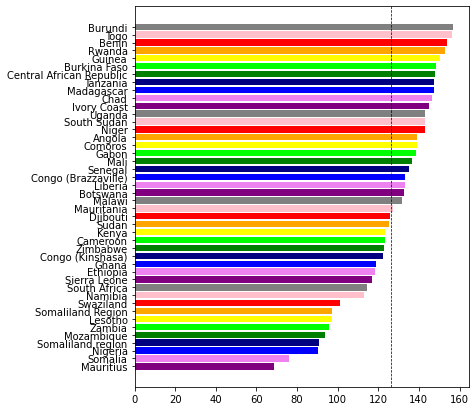

Happiness Rank in Countries in Southern Asia


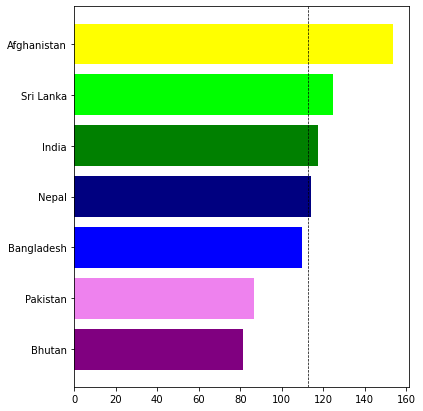

In [62]:
def reg_states(df, reg, colors):
    region_states = df[df.region == reg].groupby('country',)['happiness_rank'].mean().\
    reset_index().sort_values('happiness_rank')
    
    print('Happiness Rank in Countries in {}'.format(reg))
    plt.subplots(figsize=(6,7))
    plt.barh(region_states.country, region_states.happiness_rank, color=colors)
    plt.axvline(region_states.happiness_rank.mean(), color='black', linewidth=0.7, linestyle="--")
    plt.show()
    
for reg in df16.region.unique():
    reg_states(regs, reg, colors)

### Happiness Rank Statistics

In [68]:
regs_piv = regs.pivot_table(index='region', values='happiness_rank', aggfunc='describe').sort_values('mean')\
    .reindex(columns = ('count', 'min', '25%', '50%', '75%', 'max', 'mean', 'std'))

regs_piv

,count,min,25%,50%,75%,max,mean,std
region,,,,,,,,
Australia and New Zealand,4.0,8.0,8.75,9.0,9.25,10.0,9.000000,0.816497
North America,4.0,5.0,5.75,9.5,13.50,15.0,9.750000,4.991660
Western Europe,42.0,1.0,7.00,19.0,37.00,102.0,29.357143,29.005316
Latin America and Caribbean,46.0,12.0,26.25,42.5,57.75,136.0,47.652174,28.972951
Eastern Asia,12.0,34.0,46.75,64.5,83.25,101.0,65.833333,23.217679
Middle East and Northern Africa,39.0,11.0,38.50,80.0,108.00,156.0,77.846154,41.903736
Central and Eastern Europe,58.0,27.0,59.25,75.5,94.50,134.0,78.724138,26.045031
Southeastern Asia,18.0,22.0,50.50,80.5,101.25,145.0,80.611111,38.564139
Southern Asia,14.0,79.0,95.75,113.5,120.25,154.0,112.428571,23.666641


### HS vs. GDP per capita in Regions

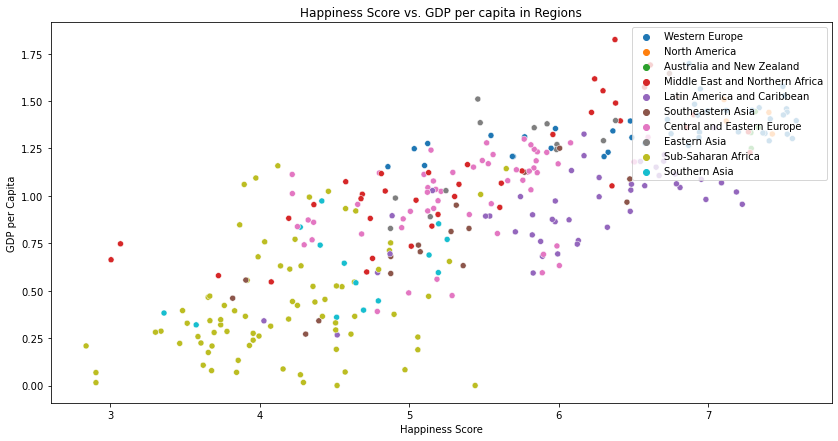

In [71]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.scatterplot(x='happiness_score', y='gdp_per_capita', data=regs, hue='region')
ax.set(title='Happiness Score vs. GDP per capita in Regions')
ax.set_xlabel('Happiness Score')
ax.set_ylabel('GDP per Capita')
ax.legend(loc='upper right');

#### Focus: Western Europe and in Sub-Saharan Africa

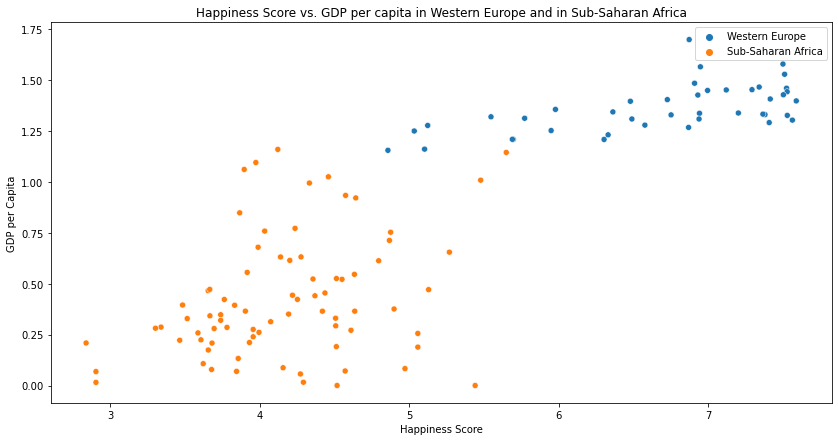

In [72]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.scatterplot(x='happiness_score', y='gdp_per_capita', data=regs[regs.region.isin(['Sub-Saharan Africa',\
                'Western Europe'])], hue='region')
ax.set(title='Happiness Score vs. GDP per capita in Western Europe and in Sub-Saharan Africa')
ax.set_xlabel('Happiness Score')
ax.set_ylabel('GDP per Capita')
ax.legend(loc='upper right');

### Regions' GDP

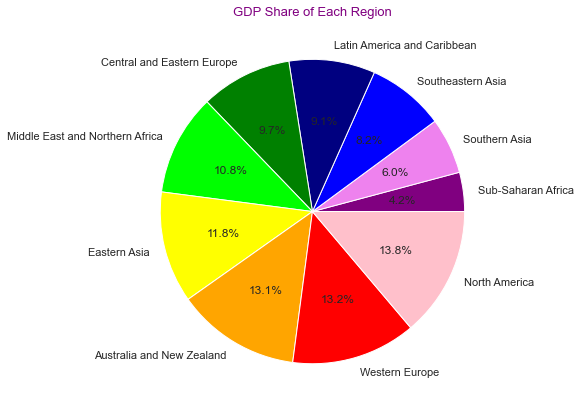

In [86]:
reg_gdp = regs.groupby('region', as_index=False)['gdp_per_capita'].mean().sort_values('gdp_per_capita')

plt.subplots(figsize=(8,7))
plt.title('GDP Share of Each Region', color='purple', size=13)
plt.pie(reg_gdp.gdp_per_capita, labels=reg_gdp.region, autopct='%1.1f%%', colors=colors)
plt.show()

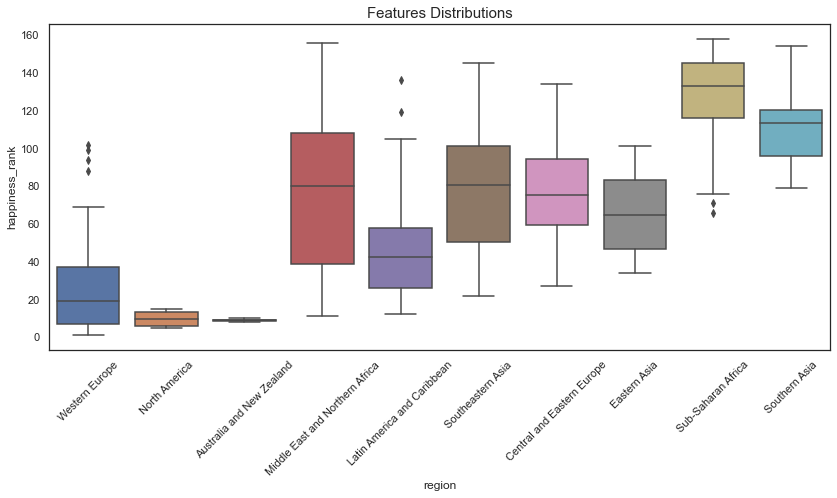

In [88]:
plt.subplots(figsize=(14,6))
sns.boxplot(data= regs, x='region', y='happiness_rank')
plt.xticks(rotation=45)
plt.title('Features Distributions', size=15)
plt.show();